## TRAIN A "DOG VS CLASS" CLASSIFIER FROM SCRATCH. WE WILL USE 2000 PICTURES FOR TRAINING, 1000 FOR VALIDATION AND 1000 FOR TESTING.

###  ACTUAL DATASET HAS 60000 DOG AND 60000 CAT IMAGES

### METHODS for solving small datasets and computer vision tasks
1. Train without any regularization- set a baseline- 71% accuracy
2. Use data augmentation- powerful technique to avoid overfitting- 82% accuracy
3. feature extraction with a pretrained network(90%-96%)
4. Fine tuning a pretrained nework- 97%


## Copying images to train, validation and test directories

In [3]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy[…]”


### Counting our images - sanity check

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Building our Network

### Instantiate a small convnet for cats vs dog classification 
 Since we are dealing with bigger images and more complex problem, we will make our network deeper. Start with 150*150 image and end up with feature maps of size 7 * 7 before the flatten layer

In [5]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [42]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 128)       73856     
__________

## Configuring our model for training

In [11]:
from keras import optimizers

In [14]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

## Data Preprocessing

Input data has to be formatted appropriately into tensors before being fed into the network. Currently our data sits on the drive as JPG files, so the steps for getting it into our network are as follows.
1. Read picture file
2. Decode JPEG content to RBG grid of pixels
3. Convert these into floating point tensors
4. Rescale pixels (0,255) into [0,1]

**keras.preprocessing.image contains ImageDataGenerator that sets up python generator that can turn any image on disk into batches of preprocessed tensors

## Using ImageDataGenerator to read images form directory

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small/train' ,   
    # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(20, 150, 150, 3)
(20,)


## Fit our Model to the data using batch generator

In [17]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 169s - loss: 0.6917 - acc: 0.5188 - val_loss: 0.6917 - val_acc: 0.5100
Epoch 2/30
100/100 [==============================] - 167s - loss: 0.6808 - acc: 0.5708 - val_loss: 0.7090 - val_acc: 0.4970
Epoch 3/30
100/100 [==============================] - 167s - loss: 0.6676 - acc: 0.5878 - val_loss: 0.6624 - val_acc: 0.5720
Epoch 4/30
100/100 [==============================] - 167s - loss: 0.6559 - acc: 0.6283 - val_loss: 0.6485 - val_acc: 0.6310
Epoch 5/30
100/100 [==============================] - 162s - loss: 0.6394 - acc: 0.6378 - val_loss: 0.6355 - val_acc: 0.6340
Epoch 6/30
100/100 [==============================] - 171s - loss: 0.6268 - acc: 0.6553 - val_loss: 0.6388 - val_acc: 0.6240
Epoch 7/30
100/100 [==============================] - 178s - loss: 0.6088 - acc: 0.6859 - val_loss: 0.6366 - val_acc: 0.6370
Epoch 8/30
100/100 [==============================] - 174s - loss: 0.5903 - acc: 0.6913 - val_loss: 0.6059 - val_acc: 0.6640


# Displaying curves of loss and accuracy during training

In [21]:
history.history

{'acc': [0.51875938156833046,
  0.57078539406794082,
  0.58779389706774321,
  0.6283141552895054,
  0.63781890951436182,
  0.65532766389155039,
  0.68584291952261034,
  0.69134567054049145,
  0.7038519282589083,
  0.70985492600268751,
  0.72986493285385712,
  0.73286643443911481,
  0.76038019131755397,
  0.76838419513740563,
  0.77788894578419432,
  0.78889444951953858,
  0.79739869651703787,
  0.80790395641875545,
  0.81140570395466327,
  0.82841420656684162,
  0.84142071145841513,
  0.85092545998818048,
  0.85492746328460745,
  0.87143571353543092,
  0.88394196681108039,
  0.89194596851390862,
  0.89394696710585597,
  0.91445722610965974,
  0.92496247527717412,
  0.93246623028392128],
 'loss': [0.69165904719332205,
  0.6807865016218303,
  0.66756633867795256,
  0.65585308348673355,
  0.63944855351755769,
  0.62674995095447161,
  0.60879804606196763,
  0.59024362942169406,
  0.57279317069793112,
  0.56045025455886088,
  0.53466801873858782,
  0.52531739827869772,
  0.5051315392238489,

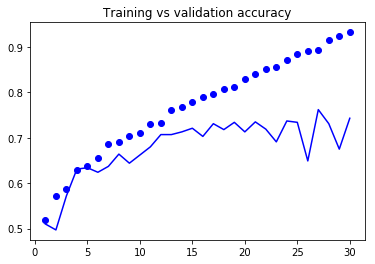

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
acc= history.history['acc']
val_acc= history.history['val_acc']
loss=history.history['loss']
val_loss= history.history['val_loss']
epochs= range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label="Validation acc")
plt.title("Training vs validation accuracy")


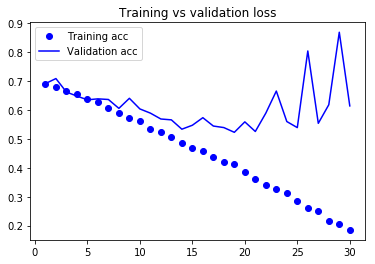

In [24]:
plt.plot(epochs,loss,'bo',label='Training acc')
plt.plot(epochs,val_loss,'b',label="Validation acc")
plt.title("Training vs validation loss")
plt.legend()

** The plot clearly demonstrate overfitting. The training accuracy increases linearly over time, while validation accuracy stalls at 70%.
** Training loss keeps decreasing while validation loss reaches its minimum after 5 epochs

## PREVENT OVERFITTING- Data Augmentation

Apply several transformation that yield in believable looking images

This can be done by configuring number of random transformations to be performed on the images read by our ImageDataGenerator instance. 

### Setting up data augmentation configuration via ImageDataGenerator

In [25]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 

### Displaying sample augmented training image

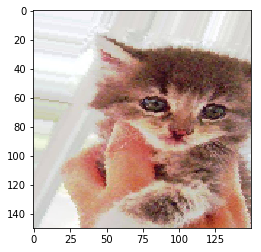

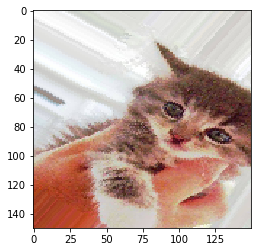

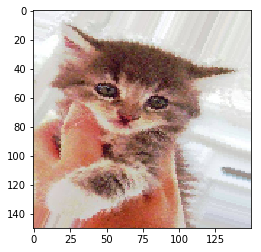

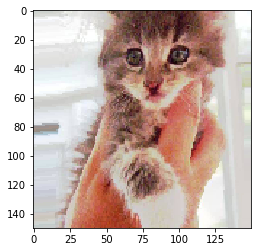

In [26]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path= fnames[3]
# Read the image and resize it
img= image.load_img(img_path, target_size=(150,150))
# Convert it to numpy array with shape(150,150,3)
x= image.img_to_array(img)
# Reshape it to (1,150,150,3)
x= x.reshape((1,)+x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break



## Defining a new convnet that includes dropout

In [27]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [29]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

## Lets try our network on data augmentation and dropout. Using ImageDataGenerator to read images form directory

In [30]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small/train' ,   
    # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,
      validation_steps=50)


Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 226s - loss: 8.0233 - acc: 0.5013 - val_loss: 0.7800 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 259s - loss: 8.0552 - acc: 0.5002 - val_loss: 0.7937 - val_acc: 0.4830
Epoch 3/10
100/100 [==============================] - 282s - loss: 8.0561 - acc: 0.5002 - val_loss: 0.7796 - val_acc: 0.5010
Epoch 4/10
100/100 [==============================] - 226s - loss: 8.0556 - acc: 0.5002 - val_loss: 0.7782 - val_acc: 0.5030
Epoch 5/10
100/100 [==============================] - 203s - loss: 8.0544 - acc: 0.5003 - val_loss: 0.7739 - val_acc: 0.5110
Epoch 6/10
100/100 [==============================] - 194s - loss: 8.0540 - acc: 0.5003 - val_loss: 0.7800 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 194s - loss: 8.0573 - acc: 0.5001 - val_loss: 0.7789 - val_acc: 0.5010
Epoch 8/10
100/100 [=====================

*** Should have ran upto 50 epochs for better accuracy

# Displaying curves of loss and accuracy during training

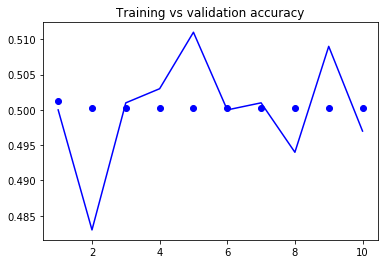

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
acc= history.history['acc']
val_acc= history.history['val_acc']
loss=history.history['loss']
val_loss= history.history['val_loss']
epochs= range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label="Validation acc")
plt.title("Training vs validation accuracy")


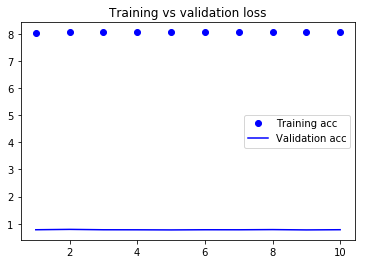

In [33]:
plt.plot(epochs,loss,'bo',label='Training acc')
plt.plot(epochs,val_loss,'b',label="Validation acc")
plt.title("Training vs validation loss")
plt.legend()

## USING A PRETRAINED CONVNET

Several architecture exists
1. VGG16, Resnet etc

### Two ways you can use pre-trained network: feature extraction and fine tuning

### Feature extraction- It consists of using representations used by previous network to extract new features from new sample. This consists of taking convolutional base of previously training layer and running new data on top of it and training a new classifier on top of it

*** We avoid reusing densely connected classifier, the reason is that the representations learned by convolutional base are likely to be more generic and therefore more reusable



*** VGG16 model comes prepackaged with Keras. It can be imported from keras.applications module. List of image classifier(all pretrained on imagenet dataset and are part of keras.applications
Xception
InceptionV3
ResNet50
VGG16
VGG19
MobileNet

In [34]:
## Instantiate VGG16 convolutional base 


from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


*** weights, to specify which weight checkpoint to initialize the model from ***

*** include_top, which refers to including or not the densely-connected classifier on top of the network. By default, this densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected classifier (with only two classes, cat and dog), we don’t need to include it.

***input_shape, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don’t pass it, then the network will be able to process inputs of any size***


In [35]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

*** The final feature has shape(4,4,512). We will stick a densely connected classifier on top of this feature
At this point, there are two ways we could proceed:”
1.Running the convolutional base over our dataset, recording its output to a Numpy array on disk, then using this data as input to a standalone densely-connected classifier similar to those you have seen in the first chapters of this book.
Using this approach, we cant use data augmentation
We will start by simply running instances of the previously-introduced ImageDataGenerator to extract images as Numpy arrays as well as their labels. We will extract features from these images simply by calling the predict method of the conv_base model.”

## Extracting features using pre-trained convolutional base

In [ ]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

** Extracted fearures have shape (samples,4,4,512). We will feed them to a densely connected classifier. Before that,we must flatten them to (samples,8192)

In [ ]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

## Define our densely connected classifier

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

We can do the same plotting again- This achieves around 90% accuracy

## Second way -More expensive, GPU only. In this method, add a model(conv_base) to a sequential model , then freeze few layers so that their weights dont change, If we dont do that, then representations previously learned by convolutional base will be modified during training

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
conv_base.trainable=False

In [ ]:
## Training the model end-end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
“validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)



In [ ]:
# Plotting

## Fine Tuning- It consists of unfreezing a few of top layers of frozen base model used for feature extraction, and jointly training both newly added part of the model and these top layers

## Convnet Visualization

1. ## Visualization intermediate activations

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 128)       73856     
__________

## Preprocessing a single image

In [46]:
img_path = '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/cats_and_dogs_small/test/cats/cat.7004.jpg'
# proprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
img= image.load_img(img_path, target_size=(150,150))
# Convert it to numpy array with shape(150,150,3)
img_tensor= image.img_to_array(img)
img_tensor= np.expand_dims(img_tensor, axis=0)
img_tensor/=255


In [47]:
img_tensor.shape

(1, 150, 150, 3)

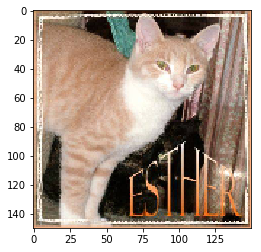

In [50]:
plt.imshow(img_tensor[0])

#### Filters and intermediate layers visualizations

<img style="float:left;transform: rotate(90deg); width:1200px" src="6.jpg" />
<img style="float:left;transform: rotate(90deg); width:1200px" src="7.jpg" />

## Visualizing heatmaps of class activation  using Grad CAM

** It consists in taking the output feature map of a convolutional layer given an input image, and weighing every channel in that feature map by the gradient of the class with respect to the channel

In [66]:
## Loading a VGG 16 network with pretrained weights
from keras.applications.vgg16 import VGG16

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet') 

553426944/553467096 [============================>.] - ETA: 0s

## Image preprocessing as per vgg16

(1, 224, 224, 3)


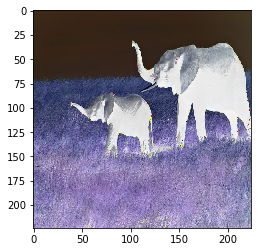

In [70]:
img_path = '/Users/shashank/Downloads/SpringboardDatascience/_1Deeplearning/Deep_learning_with_Python/Chapter5_assignment/8.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
from keras.applications.vgg16 import preprocess_input, decode_predictions
# input image 224*224
img = image.load_img(img_path, target_size=(224, 224))
# to change to float32: (224,224,3)
img_tensor = image.img_to_array(img)
# add a dimension to transform our array to batch (1,224,224,3)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:

# Its shape is (1, 224, 224, 3)
print(img_tensor.shape)
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
# preprocess the batch , this doesn channel wise color normalization
x= preprocess_input(img_tensor)


## Prediction class of our image

In [71]:
preds= model.predict(x)

In [74]:
preds.shape

(1, 1000)

In [75]:
decode_predictions(preds)

24576/35363 [===================>..........] - ETA: 0s

[[('n02504458', 'African_elephant', 0.89544857),
  ('n01871265', 'tusker', 0.099676155),
  ('n02504013', 'Indian_elephant', 0.0046395529),
  ('n02408429', 'water_buffalo', 0.00022982209),
  ('n02397096', 'warthog', 4.8111824e-06)]]

In [76]:
np.argmax(preds[0])
# at index 386, entry in prediction that was maximally activated

386

## To visualize which part of our image were most "African elephant" we set up Grad CAM algorithm

In [ ]:
# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)
